## LSA & LDA 

___(With stop words)___

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_colwidth', -1)

_________________________________________________

#### Import pickled stop words from `Effects of Stop Words Elimination for Arabic Information Retrieval: A Comparative Study`

In [3]:
stop_words_df = pd.read_pickle('/home/jovyan/capstone-52/topic_modeling_experiments/pickled_stopwords/comp_study_stopwords.p')

In [4]:
stop_words_df.columns = ["stop_words"]

In [5]:
stop_words_df.columns

Index(['stop_words'], dtype='object')

In [6]:
iabuelkhair_stopwords = stop_words_df['stop_words'].tolist()

In [7]:
iabuelkhair_stopwords[:4]

['ุงููุง', 'ุงุซูุงุก', 'ุงุฌู', 'ุงุญุฏุง']

### Access corpus through pickled MongoDB file

In [8]:
cd ../../Pickled_from_mongo/

/home/jovyan/capstone-52/Pickled_from_mongo


In [9]:
df = pd.read_pickle('../Pickled_from_mongo/combined_eg_gulf_200k_sample.p')

In [10]:
df.head(3)

_id cleaned_geo  cleaned_name  \
0  5a2c7a44204c9e0400cdc0e2  None        kamal          
1  5a2c7a44204c9e0400cdc0e3  Egypt       agabdelrehim   
2  5a2c7a44204c9e0400cdc0e4  None        ElsndubadE     

                                                                                             cleaned_text  \
0  ุฃุฒุงู ุฃููู ูู ููุง ุฒูุงู ูุงููุงุถู ูุงู ูู ุงูุบูุจ ุจูุฑู ูุงููู ุฃุญูุง ููู ุฏูููุช ููุงู ุญ ูููุช ุนูููุง ููุง ูุฏุฑู          
1  ูู ุขุฑุงุก ุขู ุจุณ ุฃุฒุงู ุฃุฌููุฑู ููุชูู ูุนูู ุฃูุงู ูู ูููุด ุงููุฏุงู ุงูุชุงุฑูุฎู ููุณูุชู ู ูู ููุณู ุงูู ุนุฏุฏ ูู ุงูุงูุฏุงูโฆ   
2  ุฃูุช ุตููู ุฃุฒุงู ุชูุงุฑู ุดุงุฏู ุจุงูุฎุทูุจ ุฃูู ูู ุงููุญูุฏ ุฃูู ุฎุฏ ุงูููุฑุฉ ุงูุฐูุจูุฉ ูู ูุตุฑ ูุจุดูุงุฏุช ุงูุฒูููุงูู ูุจู ุงูุฃโฆ   

  class  
0  EG    
1  EG    
2  EG

In [11]:
df = df.drop(['_id', 'cleaned_geo', 'cleaned_name'], axis=1)

In [14]:
df = df.drop_duplicates(['cleaned_text'], keep=False)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179632 entries, 0 to 95683
Data columns (total 2 columns):
cleaned_text    179632 non-null object
class           179632 non-null object
dtypes: object(2)
memory usage: 4.1+ MB


## Benchmark LSA with stop words

### Label Encode the Categories


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
df['class_numerical'] = le.fit_transform(df['class'])

### TFIDF

### Prepare Document Term Matrix


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1, stop_words= iabuelkhair_stopwords)

In [20]:
document_term_matrix_sps = tfidf_vectorizer.fit_transform(df.cleaned_text)

In [21]:
document_term_matrix_sps


<179632x218701 sparse matrix of type '<class 'numpy.float64'>'
	with 1366041 stored elements in Compressed Sparse Row format>

### Compute SVD of Document Term Matrix

In [24]:
from sklearn.decomposition import TruncatedSVD

In [25]:
n_components = 50
SVD = TruncatedSVD(n_components)
component_names = ["component_"+str(i+1) for i in range(n_components)]

In [26]:
svd_matrix = SVD.fit_transform(document_term_matrix_sps)

In [27]:
SVD.explained_variance_ratio_

array([ 0.00214205,  0.00247348,  0.00229391,  0.00199443,  0.00186785,
        0.00171522,  0.0015905 ,  0.00148238,  0.00135054,  0.00123149,
        0.00122168,  0.00117116,  0.00109812,  0.00103643,  0.00101351,
        0.00099886,  0.00095942,  0.00089476,  0.00088403,  0.00087113,
        0.00085381,  0.00085049,  0.00083772,  0.00083096,  0.00080576,
        0.00078784,  0.00078725,  0.00076711,  0.00075666,  0.00075776,
        0.0007364 ,  0.00072796,  0.00071557,  0.0007174 ,  0.00069832,
        0.0006781 ,  0.00066695,  0.00066429,  0.00065476,  0.00065393,
        0.00063403,  0.00062297,  0.00061141,  0.00060386,  0.00059727,
        0.00058227,  0.000579  ,  0.0005683 ,  0.00056274,  0.00054987])

In [28]:
svd_matrix.shape

(179632, 50)

### Load SVD Matrix with Documents and Labels


In [27]:
latent_semantic_analysis = pd.DataFrame(svd_matrix,
                                        index=df.index,
                                        columns=component_names)
latent_semantic_analysis['cleaned_text'] = df.cleaned_text
latent_semantic_analysis['class'] = df['class']

In [30]:
latent_semantic_analysis.head()


component_1  component_2  \
0  0.040851    -0.013632      
1  0.040925    -0.027291      
2  0.006369    -0.001625      
3  0.020012    -0.007794      
4  0.067496    -0.044303      

                                                                                                               cleaned_text  \
0  ุฃุฒุงู ุฃููู ูู ููุง ุฒูุงู ูุงููุงุถู ูุงู ูู ุงูุบูุจ ุจูุฑู ูุงููู ุฃุญูุง ููู ุฏูููุช ููุงู ุญ ูููุช ุนูููุง ููุง ูุฏุฑู                            
1  ูู ุขุฑุงุก ุขู ุจุณ ุฃุฒุงู ุฃุฌููุฑู ููุชูู ูุนูู ุฃูุงู ูู ูููุด ุงููุฏุงู ุงูุชุงุฑูุฎู ููุณูุชู ู ูู ููุณู ุงูู ุนุฏุฏ ูู ุงูุงูุฏุงูโฆ                     
2  ุฃูุช ุตููู ุฃุฒุงู ุชูุงุฑู ุดุงุฏู ุจุงูุฎุทูุจ ุฃูู ูู ุงููุญูุฏ ุฃูู ุฎุฏ ุงูููุฑุฉ ุงูุฐูุจูุฉ ูู ูุตุฑ ูุจุดูุงุฏุช ุงูุฒูููุงูู ูุจู ุงูุฃโฆ                     
3  ุฃุฒุงู ุงููุงุณ ูุงูุช ุจุชุบุฑุฏ ูู ุงูุฎูุณููุงุช ูุจู ุฅุฎุชุฑุงุน ุชููุชุฑ                                                                        
4  ุงูุชูููุฒ ุงููู ูุนุงูุง ูู ุงูุญูู ูุงููุญุด ูุงููุตุงูุจ ูุงูุงูู ูุงููุดู ูุด ุนุงุฑูู ูู ุบูุฑู ููุช ูุนูุด ุฃุฒุงู ุฑุจูุง ูุฎูููู ููุง ููุด ุชููุชู ุชูุตูู   

  class  
0  EG    
1  EG    
2  EG    
3  EG    
4  EG

In [32]:
vocabulary_loadings = pd.DataFrame(SVD.components_,
                                   index=component_names,
                                   columns=tfidf_vectorizer.get_feature_names()).T

In [33]:
vocabulary_loadings['abs_component_1'] = np.abs(vocabulary_loadings.component_1)
vocabulary_loadings['abs_component_2'] = np.abs(vocabulary_loadings.component_2)

### Display Top Terms for Each Component

In [34]:
vocabulary_loadings.sort_values('abs_component_1',ascending=False).head(10)

component_1  component_2  abs_component_1  abs_component_2
ูุง     0.518308     0.105882     0.518308         0.105882       
ุงููู   0.369124     0.829093     0.369124         0.829093       
ูุด     0.320755    -0.257180     0.320755         0.257180       
ูุงููู  0.276075    -0.200997     0.276075         0.200997       
ูุฏุง    0.264343    -0.207582     0.264343         0.207582       
ุจุณ     0.243458    -0.167986     0.243458         0.167986       
ููุง    0.186145    -0.050867     0.186145         0.050867       
ุงูู    0.179963    -0.155853     0.179963         0.155853       
ุงููู   0.162563    -0.098702     0.162563         0.098702       
ุฏู     0.134121    -0.090823     0.134121         0.090823

In [35]:
vocabulary_loadings.sort_values('abs_component_2',ascending=False).head(10)

component_1  component_2  abs_component_1  abs_component_2
ุงููู   0.369124     0.829093     0.369124         0.829093       
ูุด     0.320755    -0.257180     0.320755         0.257180       
ูุฏุง    0.264343    -0.207582     0.264343         0.207582       
ูุงููู  0.276075    -0.200997     0.276075         0.200997       
ุจุณ     0.243458    -0.167986     0.243458         0.167986       
ุงูู    0.179963    -0.155853     0.179963         0.155853       
ูุง     0.518308     0.105882     0.518308         0.105882       
ุดุงุก    0.044677     0.102145     0.044677         0.102145       
ุงููู   0.162563    -0.098702     0.162563         0.098702       
ุฏู     0.134121    -0.090823     0.134121         0.090823

(-0.5, 1)

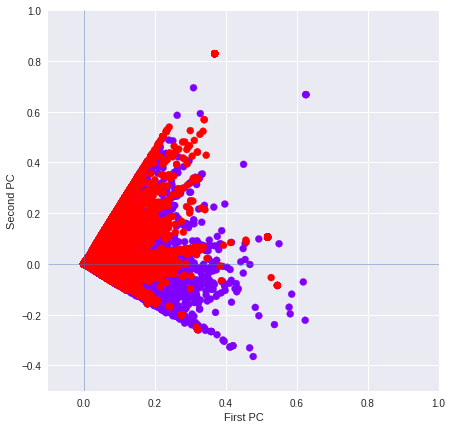

In [36]:
plt.figure(figsize=(7,7))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.5,1)

In [37]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

strings = df['cleaned_text'].values
for i, (x, y) in enumerate(zip(pc_1, pc_2)): 
    plt.text(x,y,strings[i][:10])

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.1,1)

(-0.1, 1)

ValueError: 
$ $
^
Expected end of text (at char 0), (line:1, col:1)

(-0.3, 0.6)

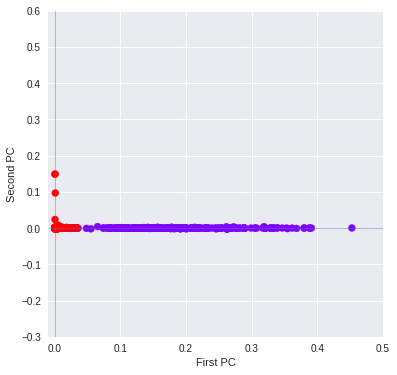

In [103]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=df['class_numerical'], cmap='rainbow')

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.01,.5)
plt.ylim(-.3,.6)

In [44]:
eg_mask = latent_semantic_analysis['class'] == 'EG'

In [45]:
latent_semantic_analysis[eg_mask][:5]

component_1  component_2  \
0  0.040851    -0.013632      
1  0.040925    -0.027291      
2  0.006369    -0.001625      
3  0.020012    -0.007794      
4  0.067496    -0.044303      

                                                                                                               cleaned_text  \
0  ุฃุฒุงู ุฃููู ูู ููุง ุฒูุงู ูุงููุงุถู ูุงู ูู ุงูุบูุจ ุจูุฑู ูุงููู ุฃุญูุง ููู ุฏูููุช ููุงู ุญ ูููุช ุนูููุง ููุง ูุฏุฑู                            
1  ูู ุขุฑุงุก ุขู ุจุณ ุฃุฒุงู ุฃุฌููุฑู ููุชูู ูุนูู ุฃูุงู ูู ูููุด ุงููุฏุงู ุงูุชุงุฑูุฎู ููุณูุชู ู ูู ููุณู ุงูู ุนุฏุฏ ูู ุงูุงูุฏุงูโฆ                     
2  ุฃูุช ุตููู ุฃุฒุงู ุชูุงุฑู ุดุงุฏู ุจุงูุฎุทูุจ ุฃูู ูู ุงููุญูุฏ ุฃูู ุฎุฏ ุงูููุฑุฉ ุงูุฐูุจูุฉ ูู ูุตุฑ ูุจุดูุงุฏุช ุงูุฒูููุงูู ูุจู ุงูุฃโฆ                     
3  ุฃุฒุงู ุงููุงุณ ูุงูุช ุจุชุบุฑุฏ ูู ุงูุฎูุณููุงุช ูุจู ุฅุฎุชุฑุงุน ุชููุชุฑ                                                                        
4  ุงูุชูููุฒ ุงููู ูุนุงูุง ูู ุงูุญูู ูุงููุญุด ูุงููุตุงูุจ ูุงูุงูู ูุงููุดู ูุด ุนุงุฑูู ูู ุบูุฑู ููุช ูุนูุด ุฃุฒุงู ุฑุจูุง ูุฎูููู ููุง ููุด ุชููุชู ุชูุตูู   

  class  
0  EG    
1  EG    
2  EG    
3  EG    
4  EG

In [40]:
gulf_mask = latent_semantic_analysis['class'] == 'GULF'

In [42]:
latent_semantic_analysis[gulf_mask][:5]

component_1  component_2  \
0  0.007562    -0.000259      
1  0.001542    -0.000121      
2  0.001285     0.000157      
3  0.018259    -0.006987      
4  0.071783     0.158170      

                                                                                              cleaned_text  \
0  ุนูู ุงูุงูู ุงุฑุญู ูู ุงู ุชุชุนูุฏ ุนูู ูุฌูุฏ ุงุญุฏ ููุบุฑูู ุงูุชูุงู ูุญุจ ููุบููู ุนู ุงูุฏููุง ูุจูุต ุงูุทุฑูุฌ ูุฎููู ุชุนุงูู ูุชุชโฆ   
1  ูุญุฏุฉ ููุงูุญุฉ ุงูููุฒ ูู ุงูุทุฑูุฌ ุงูููุฒ                                                                         
2  ุงูู ูุณุงูุฉ ุงูุทุฑูุฌ ูุงูุชูฺ โ๏ธโ๏ธโ๏ธ                                                                            
3  ููุงู ุฌููู ููู ููู ุงูุชุทุจูู ุทูุน ูุงููู ููุฎุฏู ููุดุฑ ุจุงูุฌุฑูุฏุฉ ุงูุฑุณููุฉ ูู ุฒูุงู ูููุญูู ุงุญูุง ูุงุทุฑูู ุงโฆ             
4  ุงูุซุงูุซ ุนูู ุงูุทุฑูุฌ ุทููู ุจุงูุฌ ุงูู ุงููู๏ธ                                                                     

  class  
0  GULF  
1  GULF  
2  GULF  
3  GULF  
4  GULF

In [47]:
latent_semantic_analysis[(latent_semantic_analysis['class'] == 'EG') 
                         & (latent_semantic_analysis.component_2 > .050)][:5]

component_1  component_2  \
14   0.098308     0.214051      
15   0.113691     0.103219      
55   0.133969     0.063809      
147  0.063775     0.120697      
148  0.062151     0.117917      

                                                                                 cleaned_text  \
14   ุงููู ุงูุจุฑ ุฑููููููููุนู                                                                      
15   __ ุฃูุช ุบูุฑุช ุงูููุงู ูุฏุง ุฃุฒุงู ุงูุดูุฎ ูุงุดุงุก ุงููู                                               
55   ุณุจุญุงู ุงููู ููุง ุนุฑููุง ุฃุฒุงู ูุฑุจ ููุง ููู ุณุงุนุฏุฉ ูุฏูููุชู ููุง ูุนุฑู ุณูู ููุณุฉ ููุง ุงุชูุจุถ ุนููุฉ ููู   
147  ูุง ุดุงุก ุงููู ูุง ุญุจูุจุชู ูุงุฎุฏู ุนููู ูุงูุง ููุงุฎูุฑ ูุงูุง ุจู ูุงูุง                                  
148  ูุง ุดุงุก ุงููู ูุง ุญุจูุจุชู ูุงุฎุฏู ุนููู ูุงูุง ููุงุฎูุฑ ูุงูุง ูุจู ูุงูุง                                 

    class  
14   EG    
15   EG    
55   EG    
147  EG    
148  EG

In [48]:
latent_semantic_analysis[(latent_semantic_analysis['class'] == 'GULF') 
                         & (latent_semantic_analysis.component_2 > .50)][:5]

component_1  component_2    cleaned_text class
4980  0.369124     0.829093     ูู ุงููู (       GULF
4986  0.369124     0.829093     ูู ุงููู         GULF
5234  0.241075     0.539617     ุงููู ุงููู ููุงู  GULF
9171  0.369124     0.829093     ุงููู ุงููู       GULF
9452  0.369124     0.829093     ุงููู ุงููู ๏ธ๏ธ    GULF

## LDA with stopwords

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['cleaned_text'])
X_train_counts.shape

(179632, 219558)

In [54]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(192936, 223045)

In [35]:
svd_no_zero_rows = svd_matrix[~np.all(svd_matrix == 0, axis=1)]

In [38]:
svd_no_zero_rows

(178941, 50)

In [42]:
svd_mat_int = svd_no_zero_rows.astype(int)

In [ ]:
## GENSIM

In [48]:
#!pip install -U gensim

    100% |โโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโ| 15.9MB 40kB/s  eta 0:00:01   60% |โโโโโโโโโโโโโโโโโโโโ            | 9.6MB 26.9MB/s eta 0:00:01    70% |โโโโโโโโโโโโโโโโโโโโโโโ         | 11.1MB 33.5MB/s eta 0:00:01    97% |โโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโ | 15.4MB 23.8MB/s eta 0:00:01
    100% |โโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโ| 50.0MB 13kB/s  eta 0:00:01    32% |โโโโโโโโโโโ                     | 16.5MB 35.0MB/s eta 0:00:01    78% |โโโโโโโโโโโโโโโโโโโโโโโโโ       | 39.2MB 32.6MB/s eta 0:00:01
Requirement already up-to-date: six>=1.5.0 in /opt/conda/lib/python3.6/site-packages (from gensim)
    100% |โโโโโโโโโโโโโโโโโโ

In [98]:
import nltk

In [57]:
from nltk.text import Text  

In [79]:
from gensim import models, corpora

In [56]:
word_list = [word for line in df['cleaned_text'] for word in line.split()]

In [58]:
text_eda = Text(word_list)

In [59]:
text_eda[:3]

['ุฃุฒุงู', 'ุฃููู', 'ูู']

In [68]:
len(text_eda)

1838517

In [65]:
iabuelkhair_stopwords[:3]

['ุงููุง', 'ุงุซูุงุก', 'ุงุฌู']

In [69]:
len(iabuelkhair_stopwords)

1590

In [67]:
# remove stop words from tokens
text_eda_no_stops = [i for i in text_eda if not i in iabuelkhair_stopwords]

In [70]:
len(text_eda_no_stops)

1496265

Length of text_eda decreased by 342,252 due to 1,590 stop words. 

Get a list of words in every row

In [83]:
df["cleaned_text"] = df["cleaned_text"].map(lambda x: x.split(' '))

Passing df["cleaned_text"] to gensim's Dictionary:

In [86]:
dictionary = corpora.Dictionary(df["cleaned_text"])

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(34127 unique tokens: ['ุฃุญูุง', 'ุฃุฒุงู', 'ุฃููู', 'ุงูุบูุจ', 'ุจูุฑู']...)
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary(53319 unique tokens: ['ุฃุญูุง', 'ุฃุฒุงู', 'ุฃููู', 'ุงูุบูุจ', 'ุจูุฑู']...)
INFO:gensim.corpora.dictionary:adding document #30000 to Dictionary(69263 unique tokens: ['ุฃุญูุง', 'ุฃุฒุงู', 'ุฃููู', 'ุงูุบูุจ', 'ุจูุฑู']...)
INFO:gensim.corpora.dictionary:adding document #40000 to Dictionary(80421 unique tokens: ['ุฃุญูุง', 'ุฃุฒุงู', 'ุฃููู', 'ุงูุบูุจ', 'ุจูุฑู']...)
INFO:gensim.corpora.dictionary:adding document #50000 to Dictionary(93339 unique tokens: ['ุฃุญูุง', 'ุฃุฒุงู', 'ุฃููู', 'ุงูุบูุจ', 'ุจูุฑู']...)
INFO:gensim.corpora.dictionary:adding document #60000 to Dictionary(106599 unique tokens: ['ุฃุญูุง', 'ุฃุฒุงู', 'ุฃููู', 'ุงูุบู

Using filter_extremes method to eliminate the 5000 most frequent words

In [87]:
dictionary.filter_extremes(no_below=1, no_above=1, keep_n=5000)

INFO:gensim.corpora.dictionary:discarding 260679 tokens: [('ูุงููุงุถู', 6), ('ูููุช', 9), ('ุขุฑุงุก', 12), ('ุฃุฌููุฑู', 2), ('ุฃูุงู', 10), ('ุงูุงูุฏุงูโฆ', 1), ('ุงูุชุงุฑูุฎู', 24), ('ุงููุฏุงู', 8), ('ููุณูุชู', 3), ('ุฃูู', 7)]...
INFO:gensim.corpora.dictionary:keeping 5000 tokens which were in no less than 1 and no more than 179632 (=100.0%) documents
INFO:gensim.corpora.dictionary:resulting dictionary: Dictionary(5000 unique tokens: ['ุฃุญูุง', 'ุฃุฒุงู', 'ุฃููู', 'ุงูุบูุจ', 'ุจูุฑู']...)


In [90]:
dictionary.compactify()

Using doc2bow method to get a bag of words representation (word_id, frequency) of corpus

In [100]:
corpus = [dictionary.doc2bow(text) for text in df["cleaned_text"]]

In [101]:
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


In [102]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.3333333333333333
INFO:gensim.models.ldamodel:using symmetric eta at 0.3333333333333333
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online (multi-pass) LDA training, 3 topics, 20 passes over the supplied corpus of 179632 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.030*"ูู" + 0.020*"ุงููู" + 0.019*"ุงูู" + 0.018*"ูู" + 0.018*"ูุง" + 0.015*"ูุง" + 0.014*"ุนูู" + 0.013*"ู" + 0.012*"ููุง" + 0.011*"ูู"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.048*"ูู" + 0.028*"ูู" + 0.024*"ุงูุง" + 0.013*"ูุด" + 0.013*"ุจูู" + 0.012*"ุจุณ" + 0.01

INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #22000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.070*"ูุฏุง" + 0.054*"ู" + 0.020*"ูู" + 0.017*"ุงููู" + 0.016*"ูู" + 0.015*"ุงูู" + 0.014*"ูุง" + 0.014*"ู" + 0.012*"ูุด" + 0.012*"ุ"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.050*"ูู" + 0.032*"ุงูุง" + 0.024*"ูุฏุง" + 0.021*"ูู" + 0.016*"ุ" + 0.013*"ูู" + 0.012*"ุฏุง" + 0.011*"ูุด" + 0.010*"ููุง" + 0.010*"ู"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.061*"ูุฏุง" + 0.028*"ูุง" + 0.026*"ูุด" + 0.021*"ุจุณ" + 0.020*"ูุงููู" + 0.020*"ูุง" + 0.015*"ุงูุง" + 0.014*"ููู" + 0.013*"ู" + 0.010*"ุงููู"
INFO:gensim.models.ldamodel:topic diff=0.405097, rho=0.301511
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #24000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents


INFO:gensim.models.ldamodel:topic #2 (0.333): 0.045*"ูุง" + 0.028*"ูุด" + 0.028*"ูุงููู" + 0.025*"ูุง" + 0.023*"ุงูุง" + 0.021*"ุจุณ" + 0.020*"ูุฏุง" + 0.015*"ุงููู" + 0.013*"ููู" + 0.012*"ุงูุช"
INFO:gensim.models.ldamodel:topic diff=0.212705, rho=0.218218
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #44000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.052*"ู" + 0.021*"ุงููู" + 0.021*"ุงูู" + 0.019*"ู" + 0.018*"ูู" + 0.016*"ูุฏุง" + 0.015*"ูุง" + 0.014*"ูุด" + 0.013*"ูู" + 0.012*"ูู"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.044*"ูู" + 0.036*"ุงูุง" + 0.018*"ูู" + 0.016*"ูู" + 0.016*"ุญุฏ" + 0.014*"ู" + 0.013*"ุญุงุฌู" + 0.013*"ููุง" + 0.012*"ุฏุง" + 0.012*"ุ"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.050*"ูุง" + 0.032*"ูุงููู" + 0.029*"ูุด" + 0.025*"ูุง" + 0.023*"ุงูุง" + 0.021*"ุจุณ" + 0.017*"ูุฏุง" + 

INFO:gensim.models.ldamodel:topic #0 (0.333): 0.057*"ู" + 0.023*"ูู" + 0.023*"ุงููู" + 0.018*"ุงูู" + 0.017*"ูู" + 0.016*"ุจุชุงุน" + 0.014*"ูู" + 0.014*"ุฏู" + 0.013*"ูุด" + 0.012*"ุนูู"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.051*"ูู" + 0.027*"ุงูุง" + 0.027*"ูู" + 0.015*"ุ" + 0.014*"ูู" + 0.012*"ุญุฏ" + 0.010*"ูุด" + 0.010*"ููุง" + 0.010*"ุงู" + 0.010*"ููู"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.059*"ูุง" + 0.030*"ูุด" + 0.026*"ูุงููู" + 0.025*"ูุง" + 0.022*"ุงูุง" + 0.022*"ุจุณ" + 0.014*"ุฏู" + 0.014*"ููู" + 0.012*"ุจูู" + 0.011*"ุงููู"
INFO:gensim.models.ldamodel:topic diff=0.165765, rho=0.176777
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #66000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.055*"ู" + 0.024*"ูู" + 0.022*"ุงููู" + 0.018*"ุงูู" + 0.016*"ูู" + 0.014*"ู" + 0.014*"ูู" + 0.01

INFO:gensim.models.ldamodel:topic diff=0.135999, rho=0.154303
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #86000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.042*"ู" + 0.027*"ุงููู" + 0.023*"ูู" + 0.021*"ุงูู" + 0.015*"ูู" + 0.015*"ูุด" + 0.013*"ูุง" + 0.013*"ูู" + 0.012*"ู" + 0.012*"ุฏู"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.055*"ูู" + 0.032*"ูู" + 0.022*"ุงูุง" + 0.018*"ูู" + 0.012*"ุญุงุฌู" + 0.012*"ุ" + 0.011*"ุญุฏ" + 0.011*"ุงู" + 0.010*"ููุง" + 0.010*"ููู"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.057*"ูุง" + 0.030*"ูุงููู" + 0.028*"ูุด" + 0.024*"ูุง" + 0.023*"ุงูุง" + 0.021*"ุจุณ" + 0.020*"ุงููู" + 0.011*"ุงูุช" + 0.010*"ุฑุจูุง" + 0.010*"ููู"
INFO:gensim.models.ldamodel:topic diff=0.131432, rho=0.152499
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #88000/179632
INFO:gensim.models.ldam

INFO:gensim.models.ldamodel:topic #1 (0.333): 0.071*"ูู" + 0.033*"ูู" + 0.017*"ูู" + 0.015*"ูุง" + 0.015*"ุ" + 0.011*"ุฃู" + 0.010*"ุงูุง" + 0.010*"ุนู" + 0.010*"ุงู" + 0.007*"ููุง"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.055*"ูุง" + 0.031*"ุงููู" + 0.028*"ูุง" + 0.019*"ูุงููู" + 0.019*"๏ธ" + 0.017*"ุจุณ" + 0.016*"ูุง" + 0.015*"ุงูุง" + 0.013*""" + 0.011*"ุงูููู"
INFO:gensim.models.ldamodel:topic diff=0.140942, rho=0.137361
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #108000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.041*"ู" + 0.025*"ุนูู" + 0.024*"ูู" + 0.023*"ูุง" + 0.020*"ุงููู" + 0.015*"ูู" + 0.009*"ุดู" + 0.009*"ุงูู" + 0.008*"ูู" + 0.007*"ูุน"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.068*"ูู" + 0.031*"ูู" + 0.017*"ูู" + 0.015*"ูุง" + 0.013*"ุ" + 0.011*"ุงูุง" + 0.010*"ุฃู" + 0.009*"ุงู" 

INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #128000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.041*"ู" + 0.027*"ุนูู" + 0.022*"ูู" + 0.018*"ุงููู" + 0.015*"ูู" + 0.015*"ูุง" + 0.013*"ุงูู" + 0.011*"ุดู" + 0.010*"ูู" + 0.007*"ูุน"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.068*"ูู" + 0.033*"ูู" + 0.020*"ูู" + 0.020*"ูุง" + 0.018*"ุ" + 0.017*"ุฃู" + 0.010*"ูู" + 0.009*"ุนู" + 0.009*"ูู" + 0.008*"ููุง"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.048*"ุงููู" + 0.030*"ูุง" + 0.024*"ูุง" + 0.019*"ูุงููู" + 0.018*"ุจุณ" + 0.015*"ุงูุช" + 0.014*"ุงุฐุง" + 0.014*"๏ธ" + 0.013*"ูุง" + 0.013*"""
INFO:gensim.models.ldamodel:topic diff=0.084611, rho=0.125000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #130000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents


INFO:gensim.models.ldamodel:topic #2 (0.333): 0.045*"ุงููู" + 0.029*"ูุง" + 0.023*"ูุงููู" + 0.020*"ูุง" + 0.019*"ุงูุง" + 0.017*"๏ธ" + 0.017*"ุจุณ" + 0.016*"ูุง" + 0.014*"ุงุฐุง" + 0.013*"ุงูุช"
INFO:gensim.models.ldamodel:topic diff=0.085733, rho=0.116248
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #150000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.039*"ู" + 0.027*"ุนูู" + 0.026*"ูู" + 0.020*"ุงููู" + 0.016*"ูุง" + 0.015*"ูู" + 0.011*"ูู" + 0.010*"ุดู" + 0.010*"ุงูู" + 0.009*"ูุน"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.074*"ูู" + 0.037*"ูู" + 0.022*"ุ" + 0.019*"ูุง" + 0.016*"ูู" + 0.011*"ุฃู" + 0.010*"ูู" + 0.009*"ุงู" + 0.009*"ุนู" + 0.008*"ููุง"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.046*"ุงููู" + 0.031*"ูุง" + 0.022*"ูุงููู" + 0.021*"ูุง" + 0.020*"ุงูุง" + 0.017*"ุจุณ" + 0.016*"ูุง" + 0.

INFO:gensim.models.ldamodel:topic #1 (0.333): 0.071*"ูู" + 0.043*"ูู" + 0.020*"ุ" + 0.018*"ูุง" + 0.016*"ูู" + 0.014*"ุฃู" + 0.011*"โฆ" + 0.009*"ุนู" + 0.008*"ููุง" + 0.007*"ูู"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.061*"ุงููู" + 0.036*"ูุง" + 0.023*"ูุง" + 0.017*"ูุงููู" + 0.016*"ูุง" + 0.016*"ูุงุฑุจ" + 0.014*"ุงูููู" + 0.014*"๏ธ" + 0.012*"ุงูุง" + 0.012*"ุนูู"
INFO:gensim.models.ldamodel:topic diff=0.140180, rho=0.108465
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #172000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.032*"ูู" + 0.032*"ู" + 0.031*"ุนูู" + 0.016*"ูู" + 0.015*"ูุง" + 0.013*"ุงููู" + 0.011*"โฆ" + 0.011*"ูุน" + 0.010*"ูุทุฑ" + 0.008*"ูุฐุง"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.071*"ูู" + 0.042*"ูู" + 0.022*"ุ" + 0.020*"ูุง" + 0.016*"ูู" + 0.016*"ุฃู" + 0.012*"โฆ" + 0.009*"ุน

INFO:gensim.models.ldamodel:PROGRESS: pass 1, at document #12000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.046*"ู" + 0.030*"ูู" + 0.022*"ุงููู" + 0.022*"ุนูู" + 0.017*"ูุง" + 0.015*"ูู" + 0.010*"ูู" + 0.010*"ูู" + 0.009*"ูุงู" + 0.009*"ููู"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.066*"ูู" + 0.049*"ุ" + 0.037*"ูู" + 0.019*"ูุง" + 0.017*"ุฃู" + 0.017*"ูู" + 0.010*"โฆ" + 0.009*"ููุง" + 0.008*"ุนู" + 0.007*"ููู"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.040*"ูุง" + 0.037*"ุงููู" + 0.020*"ูุง" + 0.018*"ูุด" + 0.017*"ุจุณ" + 0.015*"ุงูุง" + 0.015*"ูุง" + 0.013*"ูู" + 0.012*"ูุงููู" + 0.012*"""
INFO:gensim.models.ldamodel:topic diff=0.123120, rho=0.104362
INFO:gensim.models.ldamodel:PROGRESS: pass 1, at document #14000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents


INFO:gensim.models.ldamodel:topic #2 (0.333): 0.075*"ูุฏุง" + 0.038*"ูุง" + 0.031*"ุงูุง" + 0.027*"ูุด" + 0.022*"ุจุณ" + 0.021*"ุงููู" + 0.021*"ูุงููู" + 0.018*"ูุง" + 0.012*"ุงูุช" + 0.012*"ููู"
INFO:gensim.models.ldamodel:topic diff=0.077698, rho=0.104362
INFO:gensim.models.ldamodel:PROGRESS: pass 1, at document #34000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.054*"ู" + 0.026*"ูู" + 0.024*"ุงููู" + 0.015*"ู" + 0.014*"ุงูู" + 0.014*"ูู" + 0.014*"ูุฏุง" + 0.013*"ูุง" + 0.013*"ุญุฏ" + 0.012*"ูู"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.065*"ูู" + 0.035*"ูู" + 0.035*"ุ" + 0.018*"ูู" + 0.017*"ูุง" + 0.010*"ููุง" + 0.010*"ุฃู" + 0.010*"ููู" + 0.007*"ุนู" + 0.007*"ุงู"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.069*"ูุฏุง" + 0.040*"ูุง" + 0.032*"ุงูุง" + 0.027*"ูุด" + 0.023*"ูุงููู" + 0.022*"ุจุณ" + 0.020*"ุงููู" 

INFO:gensim.models.ldamodel:topic #0 (0.333): 0.053*"ู" + 0.028*"ุจุชุงุน" + 0.026*"ุงููู" + 0.023*"ูู" + 0.016*"ุงูู" + 0.015*"ุญุฏ" + 0.015*"ู" + 0.014*"ูุด" + 0.013*"ูู" + 0.011*"ูุง"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.062*"ูู" + 0.033*"ูู" + 0.028*"ุ" + 0.020*"ูู" + 0.016*"ูุง" + 0.011*"ููู" + 0.011*"ููุง" + 0.009*"(" + 0.008*"ุงู" + 0.007*"ุฃู"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.047*"ูุง" + 0.041*"ุงูุง" + 0.030*"ูุด" + 0.028*"ูุฏุง" + 0.027*"ูุงููู" + 0.021*"ุจุณ" + 0.017*"ูุง" + 0.017*"ุงููู" + 0.014*"ุงูุช" + 0.012*"ููู"
INFO:gensim.models.ldamodel:topic diff=0.073803, rho=0.104362
INFO:gensim.models.ldamodel:PROGRESS: pass 1, at document #56000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.060*"ู" + 0.027*"ุงููู" + 0.026*"ุจุชุงุน" + 0.024*"ูู" + 0.015*"ุงูู" + 0.014*"ุญุฏ" + 0.014*"ูุด" + 0.013

INFO:gensim.models.ldamodel:topic diff=0.083694, rho=0.104362
INFO:gensim.models.ldamodel:PROGRESS: pass 1, at document #76000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.042*"ู" + 0.024*"ูู" + 0.021*"ุงููู" + 0.018*"ูู" + 0.017*"ุงูู" + 0.015*"ูุด" + 0.013*"ูู" + 0.013*"ู" + 0.012*"ุฏู" + 0.012*"ููุง"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.065*"ูู" + 0.038*"ูู" + 0.021*"ุ" + 0.019*"ูู" + 0.017*"ูุง" + 0.011*"ููู" + 0.010*"ููุง" + 0.010*"ุงู" + 0.008*"ุนู" + 0.007*"ุฃู"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.051*"ูุง" + 0.039*"ุงูุง" + 0.030*"ูุด" + 0.022*"ูุงููู" + 0.021*"ุจุณ" + 0.020*"ุงููู" + 0.018*"ูุง" + 0.012*"ุงูุช" + 0.012*"ุฑุจูุง" + 0.011*"ููู"
INFO:gensim.models.ldamodel:topic diff=0.099173, rho=0.104362
INFO:gensim.models.ldamodel:PROGRESS: pass 1, at document #78000/179632
INFO:gensim.models.ldamodel

INFO:gensim.models.ldamodel:topic #1 (0.333): 0.066*"ูู" + 0.035*"ูู" + 0.025*"ุ" + 0.023*"ูุง" + 0.020*"ูู" + 0.010*"ูุง" + 0.010*"ููุง" + 0.010*"ููู" + 0.009*"ุงููู" + 0.008*"ุนู"
INFO:gensim.models.ldamodel:topic #2 (0.333): 0.055*"ูุง" + 0.035*"ุงูุง" + 0.024*"ูุด" + 0.024*"ุงููู" + 0.023*"ูุงููู" + 0.021*"ุจุณ" + 0.018*"ูุง" + 0.012*"ุงูุช" + 0.011*"ูุงุฑุจ" + 0.011*"""
INFO:gensim.models.ldamodel:topic diff=0.113469, rho=0.104362
INFO:gensim.models.ldamodel:PROGRESS: pass 1, at document #98000/179632
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 179632 documents
INFO:gensim.models.ldamodel:topic #0 (0.333): 0.049*"ู" + 0.026*"ุงููู" + 0.024*"ูู" + 0.015*"ุนูู" + 0.013*"ุงูู" + 0.013*"ูู" + 0.012*"ูุด" + 0.012*"ูุง" + 0.010*"ูู" + 0.010*"ูู"
INFO:gensim.models.ldamodel:topic #1 (0.333): 0.069*"ูู" + 0.036*"ูู" + 0.025*"ุ" + 0.023*"ูุง" + 0.020*"ูู" + 0.010*"ูุง" + 0.009*"ููุง" + 0.009*"ู

KeyboardInterrupt: 

In [94]:
dictionary.doc2bow(dictionary, allow_update=True, return_missing=False)

TypeError: decoding to str: need a bytes-like object, int found

In [ ]:
class MyCorpus(object):
    def __iter__(self):
        for line in open('datasets/mycorpus.txt'):
            # assume there's one document per line, tokens separated by whitespace
            yield dictionary.doc2bow(line.lower().split())

In [ ]:
corpora.Dictionary(df["cleaned_text"])

In [92]:
gensim.(dictionary, allow_update=True, return_missing=False)

AttributeError: module 'gensim' has no attribute 'doc2bow'

In [ ]:
# add a new doc (tokens) to this dictionary and update it."Same tokens to the same ids and new tokens to new ids".
# dict2 = corpora.Dictionary(moreDocs)
# dict1.merge_with(dict2)

In [76]:
new_vec = dictionary.doc2bow(text_eda_no_stops)
print(new_vec)  # the word "interaction" does not appear in the dictionary and is ignored
[(0, 1), (1, 1)]

NameError: name 'dictionary' is not defined

In [75]:
tfidf = models.TfidfModel(text_eda_no_stops)

INFO:gensim.models.tfidfmodel:collecting document frequencies
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #0


ValueError: not enough values to unpack (expected 2, got 1)

In [72]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = Dictionary(text_eda_no_stops)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in text_eda_no_stops]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

NameError: name 'Dictionary' is not defined

In [53]:
tfidf = models.TfidfModel(df.cleaned_text)

INFO:gensim.models.tfidfmodel:collecting document frequencies
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #0


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
iabuelkhair_stopwords

In [ ]:
corpus = gensim.matutils.Sparse2Corpus(scipy_sparse_matrix)

In [46]:
model = lda.LDA(n_topics=3, n_iter=2, random_state=1)

model.fit(svd_mat_int)

topic_word = model.topic_word_
n_top_words = 3

for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

INFO:lda:n_documents: 178941
INFO:lda:vocab_size: 50
INFO:lda:n_words: 0
INFO:lda:n_topics: 3
INFO:lda:n_iter: 2
INFO:lda:<0> log likelihood: 0
INFO:lda:<1> log likelihood: 0


NameError: name 'vocab' is not defined